In [1]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt
import pickle
import scipy.io
import cv2
import os
import pandas as pd
from scipy.stats import pearsonr, spearmanr

In [ ]:
def load_images_from_folder(folder):
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            img_name.append(filename)
    return images, img_name

In [ ]:
imgs, img_name = load_images_from_folder('stimuli')

In [ ]:
img_name

In [ ]:
len(scipy.io.loadmat(fn)['Results']['Disp'])

In [ ]:
fn = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/results/S04/FA_Block1.mat'

In [ ]:
len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][63][0])

In [ ]:
fn = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/results/S04/FA_Block1.mat'

for i in range(64):
    gavx, gavy, sttime, entime = [], [], [], []
    
    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

    break

gavx   = np.array(gavx)
gavy   = np.array(gavy)
sttime = np.array(sttime)
entime = np.array(entime)

res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
FixDur = entime - sttime
FixOnset = fixendtimes - FixDur + FixDur*.999

exclude_ind = np.unique([np.where(FixDur < 100)[0][0], np.where(FixOnset < 0)[0][0]])
FixX = np.delete(FixX, exclude_ind)
FixY = np.delete(FixY, exclude_ind)
FixDur = np.delete(FixDur, exclude_ind)
FixOnset = np.delete(FixOnset, exclude_ind)




In [ ]:
image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (ImWidth, ImHeight))
plt.imshow(image)




In [ ]:
image.shape

In [ ]:
scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

In [ ]:

#fixation_history_x = fix_X[i]/3
#print(fixation_history_x)
#fixation_history_y = fix_Y[i]/3
#radius_history = radius[i]/5

#print(fixation_history_x, fixation_history_y, radius_history)

# Create a 2D matrix filled with zeros of size (600, 800)
matrix_size = (1200, 1200)
matrix = np.zeros(matrix_size, dtype=int)

# Call the function to add circles to the matrix
result_matrix = add_circles(matrix, FixY, FixX, FixDur/5)


In [ ]:
plt.imshow(result_matrix)

In [ ]:
FixX(iFix) = round(FixData(iFix).gavx - Results.Disp.Resolution.width./2 + Results.ImWidth/2); 
FixY(iFix) = round(FixData(iFix).gavy - Results.Disp.Resolution.height./2 + Results.ImHeight/2);
FixDur(iFix) = FixData(iFix).entime - FixData(iFix).sttime;
FixOnset(iFix) = Results.FixEndTimes{iIm}(iFix) - FixDur(iFix);
% Bug fix to correct error in fixation onsets
FixOnset(iFix) = FixOnset(iFix) + FixDur(iFix)*.999;

In [ ]:
def load_fix_from_folder(folder):
    fix_X = []
    fix_Y = []
    radius = []
    img_name = []
    for filename in os.listdir(folder):
        fix_X.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,4])
        fix_Y.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,5])
        radius.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,6])
        img_name.append(str(scipy.io.loadmat(os.path.join(folder,filename))['currImName'][0][0]) + '.jpg')
        #print(filename)
        #print(img_name)
    return fix_X, fix_Y, radius, img_name

In [2]:
import os

def create_folder(folder_path):
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [3]:
import os

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)


In [4]:
def add_circles(matrix, x_list, y_list, r_list):
    for x, y, r in zip(x_list, y_list, r_list):
        x, y, r = int(x), int(y), int(r)
        for i in range(max(0, y - r), min(matrix.shape[0], y + r + 1)):
            for j in range(max(0, x - r), min(matrix.shape[1], x + r + 1)):
                if (i - y) ** 2 + (j - x) ** 2 <= r ** 2:
                    matrix[i][j] += 1
    return matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

n_f = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/results/S'

for q in range(10, 30):
    
    x = []
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = n_f + str(q)
    
    if folder_exists(folder_path):
    
        #fix_X, fix_Y, radius, img_name = load_fix_from_folder('S_fix/S'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps_c/S'+ str(q) +'_fix_c'
        create_folder(folder_path)

        for file in sorted(os.listdir(n_f + str(q))):
            if 'Block' in file:
                print(file)        

                fn = n_f + str(q) + '/' + file

                for i in range(64):
                    gavx, gavy, sttime, entime = [], [], [], []

                    for j in range(len(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0])):
                        gavx.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][18][0][0])
                        gavy.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][19][0][0])
                        sttime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][4][0][0])
                        entime.append(scipy.io.loadmat(fn)['Results']['FixData'][0][0][0][i][0][j][5][0][0])

                    fixendtimes       = scipy.io.loadmat(fn)['Results']['FixEndTimes'][0][0][0][i][0]
                    stim_image_name   = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-1]
                    stim_folder_name  = scipy.io.loadmat(fn)['Results']['ImPath'][0][0][0][i][0].split('\\')[-2]

                    #break

                    gavx   = np.array(gavx)
                    gavy   = np.array(gavy)
                    sttime = np.array(sttime)
                    entime = np.array(entime)

                    res_width   = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][0][0][0]
                    res_height  = scipy.io.loadmat(fn)['Results']['Disp'][0][0][0][0][2][0][0][1][0][0]
                    ImWidth     = scipy.io.loadmat(fn)['Results']['ImWidth'][0][0][0][0]
                    ImHeight    = scipy.io.loadmat(fn)['Results']['ImHeight'][0][0][0][0]

                    FixX = np.round(gavx) - (res_width/2) + (ImWidth/2)
                    FixY = np.round(gavy) - (res_height/2) + (ImHeight/2)
                    FixDur = entime - sttime
                    FixOnset = fixendtimes - FixDur + FixDur
                    
                    #print(FixDur)
                    #print(FixOnset)
                    dur_indices = np.where(FixDur < 100)[0]
                    onset_indices = np.where(FixOnset < 0)[0]

                    exclude_ind = np.unique(np.concatenate([dur_indices, onset_indices]))
        
                    print(exclude_ind)
                    FixX = np.delete(FixX, exclude_ind)
                    FixY = np.delete(FixY, exclude_ind)
                    FixDur = np.delete(FixDur, exclude_ind)
                    FixOnset = np.delete(FixOnset, exclude_ind)        
            
                    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name)
                    create_folder(os.path.join(folder_path, stim_folder_name))
                    
                    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = cv2.resize(image, (ImWidth, ImHeight))             
                
                    if image is not None and len(FixX) > 3 and len(FixY > 3):

                        # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
                        #fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
                        #fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

                        #print(img_name[i])

                        fixation_history_x = FixX
                        #print(fixation_history_x)
                        fixation_history_y = FixY
                        #radius_history = radius[i]/5

                        #print(fixation_history_x, fixation_history_y, radius_history)

                        # Create a 2D matrix filled with zeros of size (600, 800)
                        matrix_size = (ImWidth, ImHeight)
                        matrix = np.zeros(matrix_size, dtype=int)

                        # Call the function to add circles to the matrix
                        result_matrix = add_circles(matrix, FixX, FixY, FixDur/5)

                        #plt.imshow(result_matrix)
                        #plt.plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        #plt.axis('on')
                        #plt.colorbar(fraction=0.046, pad=0.04)  # Adjust fraction and pad values as needed
                        #plt.tight_layout()

                        # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
                        # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
                        # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
                        centerbias_template = np.load('centerbias_mit1003.npy')

                        # rescale to match image size
                        centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
                        # renormalize log density
                        centerbias -= logsumexp(centerbias)

                        image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                        centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
                        x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
                        y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

                        log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

                        # Scale factor
                        #scale_factor = 3

                        # Calculate the new width and height
                        #new_width = image.shape[1] * scale_factor
                        #new_height = image.shape[0] * scale_factor

                        # Resize the image using cv2.resize()
                        #image = cv2.resize(image, (new_width, new_height))

                        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                        x.append((log_density_prediction.detach().cpu().numpy()[0, 0], str(stim_folder_name), str(stim_image_name.split('.')[0]),
                                  'S' + str(q), result_matrix))

                        f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
                        axs[0].imshow(image)
                        axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[0].set_axis_off()
                        axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
                        axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[1].set_axis_off()
                        axs[2].matshow(result_matrix)
                        axs[2].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                        axs[2].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
                        axs[2].set_axis_off()
                        plt.tight_layout()
                        plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name.split('.')[0] + '.png'))
                        #plt.show()
                        plt.close()
                    #break

                # Open a file in binary write mode
                with open(folder_path + '/' + 'S' + str(q) + '.pkl', 'wb') as file:
                    pickle.dump(x, file)

                #break
            #break

Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c' created successfully.
S10_Block1.mat
[4]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' created successfully.
[3 4]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces_inv' created successfully.
[6]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia' created successfully.
[2 3]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects' created successfully.
[5]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces' created successfully.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_in

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_art_inv' already exists.
[]
Folder 

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_art' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces' already exists.
[]
Folder '/home/pranjul/Deep

[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/objects_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces_inv' already exists.
[1]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_inv' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/faces' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia' already exists.
[]
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG3_HG_heatmaps/S10_fix_c/pareidolia_art_inv' already exists.
[]
Folder '/home/

In [19]:
np.shape(x)

/shared/venvs/py3.8-torch1.7.1/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(255, 5)

In [20]:
32*8

256

In [4]:
x_loaded = {}

In [7]:
for q in range(1, 56):

    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = '/raid/pranjul/DG3_HG_heatmaps_c/S'+ str(q) +'_fix_c'
    
    if folder_exists(folder_path):
        # Open a file in binary write mode
        with open('/raid/pranjul/DG3_HG_heatmaps_c/S'+ str(q) +'_fix_c/' + 'S'+ str(q) + '.pkl', 'rb') as file:
            x_loaded[q] = pickle.load(file)

#x_loaded = [x.tolist() for x in x_loaded]

In [6]:
len(x_loaded)

6

In [15]:
x_loaded

{4: [(array([[-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
           -23.12038153, -23.12038153],
          [-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
           -23.12038153, -23.12038153],
          [-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
           -23.12038153, -23.12038153],
          ...,
          [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
           -19.91765614, -19.91765614],
          [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
           -19.91765614, -19.91765614],
          [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
           -19.91765614, -19.91765614]]),
   'pareidolia',
   '64',
   'S04',
   array([[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]])),
  (array([[-23.7525909 , -23.7525909 , -23.7

In [126]:
x_loaded[4]

[(array([[-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
          -23.12038153, -23.12038153],
         [-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
          -23.12038153, -23.12038153],
         [-21.89091177, -21.89091177, -21.89091177, ..., -23.12038153,
          -23.12038153, -23.12038153],
         ...,
         [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
          -19.91765614, -19.91765614],
         [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
          -19.91765614, -19.91765614],
         [-22.62758873, -22.62758873, -22.62758873, ..., -19.91765614,
          -19.91765614, -19.91765614]]),
  'pareidolia',
  '64',
  'S04',
  array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])),
 (array([[-23.7525909 , -23.7525909 , -23.7525909 , ..., -20.99055153,

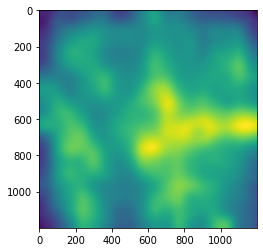

In [36]:
plt.imshow(x_loaded[4][0][0])

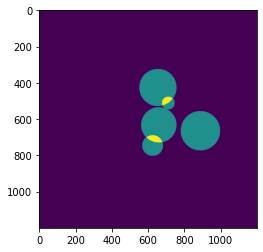

In [38]:
plt.imshow(x_loaded[4][0][4])

In [25]:
256*26

6656

In [8]:
import pandas as pd

# Assuming x_loaded is a dictionary
data_frames = []

for key, value in x_loaded.items():
    df = pd.DataFrame(value, columns=['dg3', 'stim_folder', 'stim_name', 'sub', 'hg'])
    data_frames.append(df)

# Concatenate DataFrames
df = pd.concat(data_frames, ignore_index=True)

# Display the resulting DataFrame
print(df)


                                                    dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
6430  [[-20.38224038502084, -20.38224038502084, -20....         objects   
6431  [[-22.052369795591286, -22.052369795591286, -2...      pareidolia   
6432  [[-22.79276440604324, -22.79276440604324, -22....       faces_inv   
6433  [[-25.106845728307075, -25.106845728307075, -2...         objects   
6434  [[-20.281315388215702, -20.281315388215702, -2...  pareidolia_art   

        stim_name  sub                                                 hg  
0              64  S04 

In [37]:
df_agg_hg = df.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()


In [38]:
df_agg_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
..                                                 ...  
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[256 rows x 3 columns]

In [ ]:


# Define a function to serialize the 2D arrays
def serialize_array(arr):
    return base64.b64encode(pickle.dumps(arr)).decode('utf-8')

# Apply the serialization function to the column
df_agg_hg['hg'] = df_agg_hg['hg'].apply(serialize_array)

# Save the DataFrame to a CSV file
df_agg_hg.to_csv('/raid/pranjul/agg_hg_26_subs_c.csv', index=False)

In [4]:
import base64

# Load the DataFrame from the CSV file
loaded_df_csv = pd.read_csv('/raid/pranjul/agg_hg_26_subs_c.csv')

# Define a function to deserialize the 2D arrays
def deserialize_array(serialized_arr):
    return pickle.loads(base64.b64decode(serialized_arr.encode('utf-8')))

# Apply the deserialization function to the column
loaded_df_csv['hg'] = loaded_df_csv['hg'].apply(deserialize_array)

# Now, loaded_df contains the original DataFrame with 2D arrays in 'Array_Column'

In [5]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
..                                                 ...  
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[256 rows x 3 columns]

In [11]:
sp_corr = []
for i in range(len(df['dg3'])):
    sp_corr.append(spearmanr(df['dg3'][i].flatten(), df['hg'][i].flatten())[0])
    #break


In [12]:
import pickle

# Save the list to a file
with open('/raid/pranjul/sp_corr_dg3_26_subs_c.pkl', 'wb') as file:
    pickle.dump(sp_corr, file)

In [ ]:
# Load the list from the file
with open('/raid/pranjul/sp_corr_dg3_26_subs_c.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

print(loaded_list)

In [19]:
df

dg3     stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....      pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...  pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...           faces   
3     [[-23.13883206422637, -23.13883206422637, -23....         objects   
4     [[-20.465820021512595, -20.465820021512595, -2...  pareidolia_inv   
...                                                 ...             ...   
6430  [[-20.38224038502084, -20.38224038502084, -20....         objects   
6431  [[-22.052369795591286, -22.052369795591286, -2...      pareidolia   
6432  [[-22.79276440604324, -22.79276440604324, -22....       faces_inv   
6433  [[-25.106845728307075, -25.106845728307075, -2...         objects   
6434  [[-20.281315388215702, -20.281315388215702, -2...  pareidolia_art   

        stim_name  sub  hg  
0              64  S04 NaN  
1          56_inv  S04 NaN  
2          face31  S04 NaN  
3        16_match  S04 NaN  
4          46_inv  S04 NaN  
...           ...  ...  ..  
6430     10_match  S29 NaN  
6431           26  S29 NaN  
6432   face14_inv  S29 NaN  
6433     74_match  S29 NaN  
6434  par_gaze_15  S29 NaN  

[6435 rows x 5 columns]

In [20]:
# Add the Spearman correlation values to the DataFrame
df['sp_corr'] = sp_corr

In [21]:
df = df.drop(columns=['dg3', 'hg'])

In [22]:
len(df['sp_corr'])

6435

In [23]:
df

stim_folder    stim_name  sub   sp_corr
0         pareidolia           64  S04  0.412683
1     pareidolia_inv       56_inv  S04  0.199522
2              faces       face31  S04  0.455274
3            objects     16_match  S04  0.271415
4     pareidolia_inv       46_inv  S04  0.390327
...              ...          ...  ...       ...
6430         objects     10_match  S29  0.310579
6431      pareidolia           26  S29  0.254216
6432       faces_inv   face14_inv  S29  0.259664
6433         objects     74_match  S29  0.347851
6434  pareidolia_art  par_gaze_15  S29  0.360013

[6435 rows x 4 columns]

In [223]:
result_df

stim_folder    stim_name  sub   sp_corr
0         pareidolia           64  S04  0.412683
1     pareidolia_inv       56_inv  S04  0.199522
2              faces       face31  S04  0.455274
3            objects     16_match  S04  0.271415
4     pareidolia_inv       46_inv  S04  0.390327
...              ...          ...  ...       ...
6430         objects     10_match  S29  0.310579
6431      pareidolia           26  S29  0.254216
6432       faces_inv   face14_inv  S29  0.259664
6433         objects     74_match  S29  0.347851
6434  pareidolia_art  par_gaze_15  S29  0.360013

[6368 rows x 4 columns]

In [52]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
result_df['stim_folder'] = pd.Categorical(result_df['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
df_sorted = result_df.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(df_sorted)

             stim_folder        stim_name  sub   sp_corr
3574               faces           face22  S18  0.390317
4605               faces           face24  S22  0.425249
5824               faces           face05  S27  0.248709
2286               faces           face04  S13  0.329143
763                faces           face20  S07  0.353423
...                  ...              ...  ...       ...
4517  pareidolia_art_inv  par_gaze_12_inv  S22  0.434670
910   pareidolia_art_inv  par_gaze_20_inv  S07  0.291760
4512  pareidolia_art_inv  par_gaze_17_inv  S22  0.351762
2495  pareidolia_art_inv  par_gaze_02_inv  S14  0.328035
2606  pareidolia_art_inv  par_gaze_22_inv  S14  0.336493

[6368 rows x 4 columns]


In [241]:
result_df

stim_folder stim_name  sub   sp_corr
0              faces    face01  S17  0.362184
1              faces    face04  S13  0.329143
2              faces    face13  S27  0.257281
3              faces    face18  S22  0.139306
4              faces    face05  S27  0.248709
...              ...       ...  ...       ...
6363  pareidolia_inv    74_inv  S26  0.227001
6364  pareidolia_inv    37_inv  S09  0.389919
6365  pareidolia_inv    10_inv  S15  0.288287
6366  pareidolia_inv    44_inv  S09  0.331721
6367  pareidolia_inv    13_inv  S26  0.343645

[6368 rows x 4 columns]

In [79]:
df['stim_folder']

0          pareidolia
1      pareidolia_inv
2               faces
3             objects
4      pareidolia_inv
            ...      
244        pareidolia
245    pareidolia_art
246           objects
247         faces_inv
248    pareidolia_inv
Name: stim_folder, Length: 249, dtype: object

In [24]:
df['stim_folder'].value_counts()

objects               813
pareidolia_art        812
pareidolia            808
objects_inv           806
faces_inv             802
pareidolia_inv        800
pareidolia_art_inv    798
faces                 796
Name: stim_folder, dtype: int64

In [357]:
result_df['stim_folder'].value_counts()

faces                 796
faces_inv             796
objects               796
objects_inv           796
pareidolia            796
pareidolia_inv        796
pareidolia_art        796
pareidolia_art_inv    796
Name: stim_folder, dtype: int64

In [48]:
import pandas as pd
import numpy as np

# Assuming df is your original DataFrame
# If you don't have a DataFrame, you can create a sample one
# df = pd.DataFrame({'stim_folder': ['objects']*32 + ['faces']*32 + ['pareidolia']*31 + ['pareidolia_art_inv']*31 + ['pareidolia_inv']*31 + ['pareidolia_art']*31 + ['objects_inv']*31 + ['faces_inv']*30})

# Get the unique values and their counts
value_counts = df['stim_folder'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Identify rows to be removed for each unique value
rows_to_remove = []

for stim_folder, count in value_counts.items():
    if count > min_count:
        indices = df[df['stim_folder'] == stim_folder].sample(n=count - min_count).index
        rows_to_remove.extend(indices)

# Remove the identified rows
result_df = df.drop(rows_to_remove)

# Display the result DataFrame
print(result_df)


         stim_folder    stim_name  sub   sp_corr
0         pareidolia           64  S04  0.412683
1     pareidolia_inv       56_inv  S04  0.199522
2              faces       face31  S04  0.455274
3            objects     16_match  S04  0.271415
4     pareidolia_inv       46_inv  S04  0.390327
...              ...          ...  ...       ...
6430         objects     10_match  S29  0.310579
6431      pareidolia           26  S29  0.254216
6432       faces_inv   face14_inv  S29  0.259664
6433         objects     74_match  S29  0.347851
6434  pareidolia_art  par_gaze_15  S29  0.360013

[6368 rows x 4 columns]


In [147]:
min_count

796

In [29]:
len(rows_to_remove)

67

In [17]:
from itertools import combinations

# 'Object_and_face_identification'
# Given array
task_array = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Generate all unique combinations of two tasks
combinations_list = list(combinations(task_array, 2))

# Display the result
print(combinations_list)

[('faces', 'faces_inv'), ('faces', 'objects'), ('faces', 'objects_inv'), ('faces', 'pareidolia'), ('faces', 'pareidolia_inv'), ('faces', 'pareidolia_art'), ('faces', 'pareidolia_art_inv'), ('faces_inv', 'objects'), ('faces_inv', 'objects_inv'), ('faces_inv', 'pareidolia'), ('faces_inv', 'pareidolia_inv'), ('faces_inv', 'pareidolia_art'), ('faces_inv', 'pareidolia_art_inv'), ('objects', 'objects_inv'), ('objects', 'pareidolia'), ('objects', 'pareidolia_inv'), ('objects', 'pareidolia_art'), ('objects', 'pareidolia_art_inv'), ('objects_inv', 'pareidolia'), ('objects_inv', 'pareidolia_inv'), ('objects_inv', 'pareidolia_art'), ('objects_inv', 'pareidolia_art_inv'), ('pareidolia', 'pareidolia_inv'), ('pareidolia', 'pareidolia_art'), ('pareidolia', 'pareidolia_art_inv'), ('pareidolia_inv', 'pareidolia_art'), ('pareidolia_inv', 'pareidolia_art_inv'), ('pareidolia_art', 'pareidolia_art_inv')]


In [26]:
len(df['sp_corr'])

6435

In [346]:
df

stim_folder    stim_name  sub   sp_corr
0         pareidolia           64  S04  0.412683
1     pareidolia_inv       56_inv  S04  0.199522
2              faces       face31  S04  0.455274
3            objects     16_match  S04  0.271415
4     pareidolia_inv       46_inv  S04  0.390327
...              ...          ...  ...       ...
6430         objects     10_match  S29  0.310579
6431      pareidolia           26  S29  0.254216
6432       faces_inv   face14_inv  S29  0.259664
6433         objects     74_match  S29  0.347851
6434  pareidolia_art  par_gaze_15  S29  0.360013

[6435 rows x 4 columns]

In [101]:
df["stim_folder"]

0          pareidolia
1      pareidolia_inv
2               faces
3             objects
4      pareidolia_inv
            ...      
244        pareidolia
245    pareidolia_art
246           objects
247         faces_inv
248    pareidolia_inv
Name: stim_folder, Length: 249, dtype: object

In [102]:
df["sp_corr"]

0      0.412683
1      0.199522
2      0.455274
3      0.271415
4      0.390327
         ...   
244    0.398480
245    0.268268
246    0.315395
247    0.331299
248    0.308229
Name: sp_corr, Length: 249, dtype: float64

In [30]:
combinations_list

[('faces', 'faces_inv'),
 ('faces', 'objects'),
 ('faces', 'objects_inv'),
 ('faces', 'pareidolia'),
 ('faces', 'pareidolia_inv'),
 ('faces', 'pareidolia_art'),
 ('faces', 'pareidolia_art_inv'),
 ('faces_inv', 'objects'),
 ('faces_inv', 'objects_inv'),
 ('faces_inv', 'pareidolia'),
 ('faces_inv', 'pareidolia_inv'),
 ('faces_inv', 'pareidolia_art'),
 ('faces_inv', 'pareidolia_art_inv'),
 ('objects', 'objects_inv'),
 ('objects', 'pareidolia'),
 ('objects', 'pareidolia_inv'),
 ('objects', 'pareidolia_art'),
 ('objects', 'pareidolia_art_inv'),
 ('objects_inv', 'pareidolia'),
 ('objects_inv', 'pareidolia_inv'),
 ('objects_inv', 'pareidolia_art'),
 ('objects_inv', 'pareidolia_art_inv'),
 ('pareidolia', 'pareidolia_inv'),
 ('pareidolia', 'pareidolia_art'),
 ('pareidolia', 'pareidolia_art_inv'),
 ('pareidolia_inv', 'pareidolia_art'),
 ('pareidolia_inv', 'pareidolia_art_inv'),
 ('pareidolia_art', 'pareidolia_art_inv')]

In [344]:
result_df

stim_folder stim_name  sub   sp_corr
0              faces    face01  S17  0.362184
1              faces    face04  S13  0.329143
2              faces    face13  S27  0.257281
3              faces    face18  S22  0.139306
4              faces    face05  S27  0.248709
...              ...       ...  ...       ...
6363  pareidolia_inv    74_inv  S26  0.227001
6364  pareidolia_inv    37_inv  S09  0.389919
6365  pareidolia_inv    10_inv  S15  0.288287
6366  pareidolia_inv    44_inv  S09  0.331721
6367  pareidolia_inv    13_inv  S26  0.343645

[6368 rows x 4 columns]

In [342]:
df_sorted

stim_folder        stim_name  sub   sp_corr
0                  faces           face01  S17  0.362184
525                faces           face13  S19  0.301120
526                faces           face16  S20  0.237945
527                faces           face10  S05  0.309658
528                faces           face13  S05  0.348140
...                  ...              ...  ...       ...
5301  pareidolia_art_inv  par_gaze_21_inv  S13  0.355693
5300  pareidolia_art_inv  par_gaze_01_inv  S13  0.426689
5299  pareidolia_art_inv  par_gaze_13_inv  S13  0.323324
5297  pareidolia_art_inv  par_gaze_18_inv  S22  0.292141
5571  pareidolia_art_inv  par_gaze_03_inv  S04  0.224841

[6368 rows x 4 columns]

In [349]:
result_df

stim_folder    stim_name  sub   sp_corr
0         pareidolia           64  S04  0.412683
1     pareidolia_inv       56_inv  S04  0.199522
2              faces       face31  S04  0.455274
3            objects     16_match  S04  0.271415
4     pareidolia_inv       46_inv  S04  0.390327
...              ...          ...  ...       ...
6430         objects     10_match  S29  0.310579
6431      pareidolia           26  S29  0.254216
6432       faces_inv   face14_inv  S29  0.259664
6433         objects     74_match  S29  0.347851
6434  pareidolia_art  par_gaze_15  S29  0.360013

[6368 rows x 4 columns]

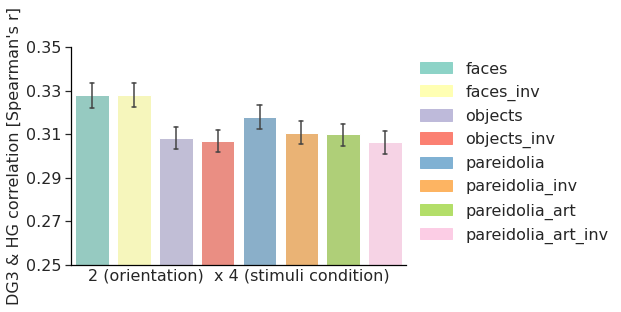

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator

x = "stim_folder"
y = "sp_corr"

# Filter the DataFrame based on the 'Time' condition
subset_df = df_sorted

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

# Create a palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(subset_df[x].unique()))  # You can choose any other colormap

# Create the barplot with the distinct color palette
ax = sns.barplot(data=subset_df, x=x, y=y, palette=palette, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars
#ax = sns.boxplot(data=subset_df, x=x, y=y, palette=palette)  # Added capsize and errwidth for error bars

'''
# Add statistical annotations
annot = Annotator(ax, combinations_list, data=subset_df, x=x, y=y)
annot.new_plot(ax, combinations_list,
               data=subset_df, x=x, y=y)
annot.configure(test='Kruskal', text_format='star', loc='outside',
                comparisons_correction="fdr_bh",
                hide_non_significant=True,
                pvalue_thresholds=[[1e-3, '∗∗∗'], [1e-2, "∗∗"], [0.05, "∗"]], verbose=2)

#annot.apply_test()

# Adjust the position of stars between lines
#annot.line_offset_to_group = 0.5
#annot.line_offset = 0.3  # Adjust this value to move the stars closer to the lines
#annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
#ax, test_results = annot.annotate(line_offset = 0.01)
#ax, test_results = annot.annotate()

ax, test_results = annot.apply_test().annotate(line_offset=0.001)
'''
# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=16)



# Remove x-axis ticks and labels
#ax.set_xticks([])
#ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.25, 0.35)
ax.set_yticks(np.linspace(0.25, 0.35, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('DG3 & HG correlation [Spearman\'s r]', fontsize=16)
#ax.set_ylabel('')
ax.set_xlabel('2 (orientation)  x 4 (stimuli condition)', fontsize=16)

#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
# ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


p-value annotation legend:
       ∗: 1.00e-02 < p <= 5.00e-02
      ∗∗: 1.00e-03 < p <= 1.00e-02
     ∗∗∗: p <= 1.00e-03

faces_inv vs. objects: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correction, P_val:6.991e-08 Stat=2.907e+01
objects_inv vs. pareidolia: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correction, P_val:2.041e-03 Stat=9.512e+00
faces vs. objects: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correction, P_val:5.318e-09 Stat=3.407e+01
faces_inv vs. objects_inv: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correction, P_val:7.125e-09 Stat=3.350e+01
objects vs. pareidolia: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correction, P_val:6.751e-03 Stat=7.338e+00
faces vs. objects_inv: Kruskal-Wallis independent samples (pairwise between groups) with Benjamini-Hochberg correctio

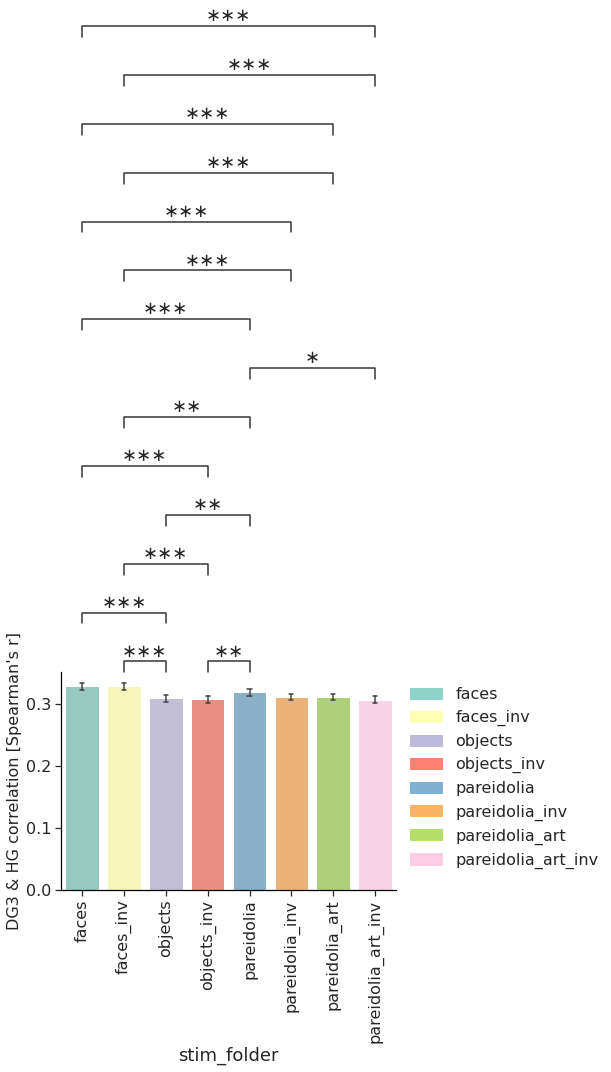

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator

x = "stim_folder"
y = "sp_corr"

# Filter the DataFrame based on the 'Time' condition
subset_df = result_df

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

# Create a palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(subset_df[x].unique()))  # You can choose any other colormap

# Create the barplot with the distinct color palette
ax = sns.barplot(data=subset_df, x=x, y=y, palette=palette, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars
# ax = sns.boxplot(data=subset_df, x=x, y=y, palette=palette)  # Added capsize and errwidth for error bars


# Add statistical annotations
annot = Annotator(ax, combinations_list, data=subset_df, x=x, y=y)
annot.new_plot(ax, combinations_list,
               data=subset_df, x=x, y=y)
annot.configure(test='Kruskal', text_format='star', loc='outside',
                comparisons_correction="fdr_bh",
                hide_non_significant=True,
                pvalue_thresholds=[[1e-3, '∗∗∗'], [1e-2, "∗∗"], [0.05, "∗"]], verbose=2, line_height = .05)

#annot.apply_test()

# Adjust the position of stars between lines
#annot.line_offset_to_group = 0.5
#annot.line_offset = 0.3  # Adjust this value to move the stars closer to the lines
#annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
#ax, test_results = annot.annotate(line_offset = 0.01)
#ax, test_results = annot.annotate()

ax, test_results = annot.apply_test().annotate(line_offset=0.001)

# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=16)



# Remove x-axis ticks and labels
#ax.set_xticks([])
#ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
#ax.set_ylim(0.25, 0.35)
#ax.set_yticks(np.linspace(0.25, 0.35, num=6))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('DG3 & HG correlation [Spearman\'s r]', fontsize=16)
#ax.set_ylabel('')
#ax.set_xlabel('2 (orientation)  x 4 (stimuli condition)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
#ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


In [149]:
print("Length of x:", len(subset_df[x]))
print("Length of y:", len(subset_df[y]))

Length of x: 6368
Length of y: 6368


In [31]:
loaded_df_csv

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  sp_corr_dg2  
0    [[-19.93076457390265, -19.93076457390265, -19....     0.525931  
1    [[-20.211706554634592, -20.211706554634592, -2...     0.687697  
2    [[-18.99151507223307, -18.99151507223307, -19....     0.694408  
3    [[-19.153439997303785, -19.153439997303785, -1...     0.734112  
4    [[-19.593251054700445, -19.593251054700445, -1...     0.529283  
..                                                 ...          ...  
251  [[-19.050094282300535, -19.050094282300535, -1...     0.602548  
252  [[-19.20552649252614, -19.20552649252614, -19....     0.783083  
253  [[-19.593265423580505, -19.593265423580505, -1...     0.703977  
254  [[-18.886519666205615, -18.886519666205615, -1...     0.656026  
255  [[-19.379200253494467, -19.379200253494467, -1...     0.735494  

[256 rows x 5 columns]

In [6]:
df_agg_hg = loaded_df_csv

In [7]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()

x = []


for i in range(len(df_agg_hg)):
    
    stim_folder_name = df_agg_hg['stim_folder'][i]
    stim_image_name = df_agg_hg['stim_name'][i]
        
    folder_path = '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/'
    
    image = cv2.imread('/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/stimuli/' + stim_folder_name + '/' + stim_image_name + '.tif')
    create_folder(os.path.join(folder_path, stim_folder_name))

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (1200, 1200))  
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # centerbias_template = np.zeros((1024, 1024))
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0,0]
    
    x.append(a)
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    # plt.savefig(os.path.join('DG2_heatmaps', '{0}.jpg'.format(i)))
    '''
    
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    #axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[1].set_axis_off()
    axs[2].matshow(df_agg_hg['hg'][i])
    #axs[2].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    #axs[2].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='white', zorder=100)
    axs[2].set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, stim_folder_name, stim_image_name + '.png'))
    #plt.show()
    plt.close()

    
    #break

Loaded pretrained weights for efficientnet-b5


Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/faces' already exists.
Folder '/home/pranjul/DeepGaze/Bachel

Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/objects' already exists.
Folder '/home/pranj

Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia' already 

Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_art_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_art_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_art_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_art_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_inv' created successfully.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Christine_Huschens/DG2E_HG_heatmaps_c/pareidolia_inv' already exists.
Folder '/home/pranjul/DeepGaze/Bachelorarbeit_Chri

In [9]:
len(x)

256

In [10]:
# Add the Spearman correlation values to the DataFrame
df_agg_hg['dg2'] = x

In [11]:
df_agg_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  
0    [[-19.93076457390265, -19.93076457390265, -19....  
1    [[-20.211706554634592, -20.211706554634592, -2...  
2    [[-18.99151507223307, -18.99151507223307, -19....  
3    [[-19.153439997303785, -19.153439997303785, -1...  
4    [[-19.593251054700445, -19.593251054700445, -1...  
..                                                 ...  
251  [[-19.050094282300535, -19.050094282300535, -1...  
252  [[-19.20552649252614, -19.20552649252614, -19....  
253  [[-19.593265423580505, -19.593265423580505, -1...  
254  [[-18.886519666205615, -18.886519666205615, -1...  
255  [[-19.379200253494467, -19.379200253494467, -1...  

[256 rows x 4 columns]

In [12]:
sp_corr_dg2 = []
for i in range(len(df_agg_hg)):
    sp_corr_dg2.append(spearmanr(df_agg_hg['dg2'][i].flatten(), df_agg_hg['hg'][i].flatten())[0])
    #break

In [13]:
# Add the Spearman correlation values to the DataFrame
df_agg_hg['sp_corr_dg2'] = sp_corr_dg2

In [14]:
df_agg_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                    hg  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                   dg2  sp_corr_dg2  
0    [[-19.93076457390265, -19.93076457390265, -19....     0.525931  
1    [[-20.211706554634592, -20.211706554634592, -2...     0.687697  
2    [[-18.99151507223307, -18.99151507223307, -19....     0.694408  
3    [[-19.153439997303785, -19.153439997303785, -1...     0.734112  
4    [[-19.593251054700445, -19.593251054700445, -1...     0.529283  
..                                                 ...          ...  
251  [[-19.050094282300535, -19.050094282300535, -1...     0.602548  
252  [[-19.20552649252614, -19.20552649252614, -19....     0.783083  
253  [[-19.593265423580505, -19.593265423580505, -1...     0.703977  
254  [[-18.886519666205615, -18.886519666205615, -1...     0.656026  
255  [[-19.379200253494467, -19.379200253494467, -1...     0.735494  

[256 rows x 5 columns]

In [15]:
df_agg_hg_dg2 = df_agg_hg.drop(columns=['dg2', 'hg'])

In [16]:
df_agg_hg_dg2

stim_folder stim_name  sp_corr_dg2
0             faces    face01     0.525931
1             faces    face02     0.687697
2             faces    face03     0.694408
3             faces    face04     0.734112
4             faces    face05     0.529283
..              ...       ...          ...
251  pareidolia_inv    75_inv     0.602548
252  pareidolia_inv    78_inv     0.783083
253  pareidolia_inv    80_inv     0.703977
254  pareidolia_inv    81_inv     0.656026
255  pareidolia_inv    83_inv     0.735494

[256 rows x 3 columns]

In [18]:
df_agg_hg_dg2['stim_folder'].value_counts()

faces                 32
pareidolia_art        32
pareidolia_inv        32
pareidolia            32
objects               32
pareidolia_art_inv    32
faces_inv             32
objects_inv           32
Name: stim_folder, dtype: int64

In [20]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
df_agg_hg_dg2['stim_folder'] = pd.Categorical(df_agg_hg_dg2['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
df_sorted = df_agg_hg_dg2.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(df_sorted)

            stim_folder        stim_name  sp_corr_dg2
0                 faces           face01     0.525931
31                faces           face32     0.610146
30                faces           face31     0.750339
29                faces           face30     0.646035
28                faces           face29     0.626982
..                  ...              ...          ...
218  pareidolia_art_inv  par_gaze_27_inv     0.633605
219  pareidolia_art_inv  par_gaze_28_inv     0.752477
220  pareidolia_art_inv  par_gaze_29_inv     0.753881
222  pareidolia_art_inv  par_gaze_31_inv     0.683020
223  pareidolia_art_inv  par_gaze_32_inv     0.582101

[256 rows x 3 columns]


In [30]:
df_sorted

stim_folder        stim_name  sp_corr_dg2
0                 faces           face01     0.525931
31                faces           face32     0.610146
30                faces           face31     0.750339
29                faces           face30     0.646035
28                faces           face29     0.626982
..                  ...              ...          ...
218  pareidolia_art_inv  par_gaze_27_inv     0.633605
219  pareidolia_art_inv  par_gaze_28_inv     0.752477
220  pareidolia_art_inv  par_gaze_29_inv     0.753881
222  pareidolia_art_inv  par_gaze_31_inv     0.683020
223  pareidolia_art_inv  par_gaze_32_inv     0.582101

[256 rows x 3 columns]

p-value annotation legend:
       ∗: 1.00e-02 < p <= 5.00e-02
      ∗∗: 1.00e-03 < p <= 1.00e-02
     ∗∗∗: p <= 1.00e-03



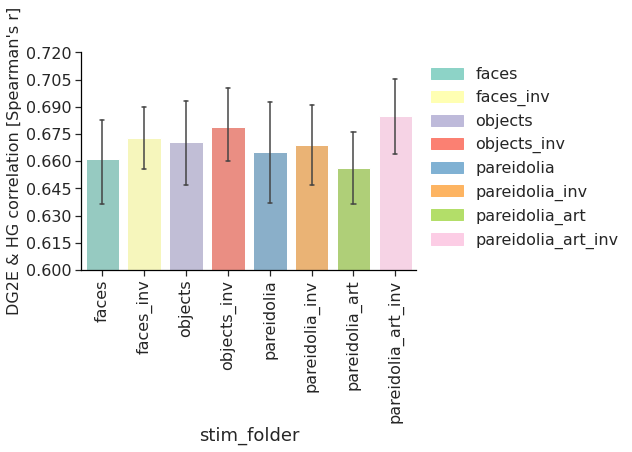

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statannotations.Annotator import Annotator

x = "stim_folder"
y = "sp_corr_dg2"

# Filter the DataFrame based on the 'Time' condition
subset_df = df_sorted

# Increase the figure size and font size
plt.figure(figsize=(6, 4))
sns.set(style="white", rc={"axes.edgecolor": "black", "grid.color": "black", "grid.linestyle": ":"}, font_scale=1.5)

# Create a palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(subset_df[x].unique()))  # You can choose any other colormap

# Create the barplot with the distinct color palette
ax = sns.barplot(data=subset_df, x=x, y=y, palette=palette, capsize=0.1, errwidth=1.5)  # Added capsize and errwidth for error bars
# ax = sns.boxplot(data=subset_df, x=x, y=y, palette=palette)  # Added capsize and errwidth for error bars


# Add statistical annotations
annot = Annotator(ax, combinations_list, data=subset_df, x=x, y=y)
annot.new_plot(ax, combinations_list,
               data=subset_df, x=x, y=y)
annot.configure(test='Kruskal', text_format='star', loc='outside',
                comparisons_correction="fdr_bh",
                hide_non_significant=True,
                pvalue_thresholds=[[1e-3, '∗∗∗'], [1e-2, "∗∗"], [0.05, "∗"]], verbose=2, line_height = .05)

#annot.apply_test()

# Adjust the position of stars between lines
#annot.line_offset_to_group = 0.5
#annot.line_offset = 0.3  # Adjust this value to move the stars closer to the lines
#annot.text_offset = 0.05  # Adjust this value to move the stars closer to the lines
#ax, test_results = annot.annotate(line_offset = 0.01)
#ax, test_results = annot.annotate()

ax, test_results = annot.apply_test().annotate(line_offset=0.001)

# Remove top and right plot edges
sns.despine()

# Define explicit legend handles
legend_labels = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color, label=label) for color, label in zip(palette, legend_labels)]

# Create legend without edges and without error bars, and change the title to "CNN"
legend = ax.legend(handles=legend_handles, title="", title_fontsize='16', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=16)



# Remove x-axis ticks and labels
#ax.set_xticks([])
#ax.set_xticklabels([])

# Set y-axis limits from 0 to 1
ax.set_ylim(0.6, 0.72)
ax.set_yticks(np.linspace(0.6, 0.72, num=9))

# Show the tick marks on the left side of the y-axis
#ax.tick_params(axis='y', direction='out', length=5)  # Adjust 'length' as needed
ax.tick_params(tick1On=True)

# Set font size for axis labels and title
ax.set_ylabel('DG2E & HG correlation [Spearman\'s r]', fontsize=16)
#ax.set_ylabel('')
#ax.set_xlabel('2 (orientation)  x 4 (stimuli condition)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


#ax.set_title('255ms:lay13-15', fontsize=18)

# Set font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Uncomment the following lines to show y-axis ticks and tick labels
# ax.set_yticks(np.linspace(0, 1.0, num=11))  # Uncomment if not already set
#ax.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

#plt.savefig('fig_5_3.png', dpi= 600, bbox_inches='tight')
#plt.savefig('fig_5_3.png', dpi= 600)


# Show the plot
plt.show()


In [19]:
# Get all unique values in the 'sub' column
unique_subs = df['sub'].unique()
unique_subs

array(['S04', 'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12',
       'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29'],
      dtype=object)

In [20]:
# Randomly shuffle the unique values
np.random.shuffle(unique_subs)
unique_subs

array(['S17', 'S22', 'S20', 'S25', 'S15', 'S13', 'S27', 'S04', 'S06',
       'S10', 'S08', 'S09', 'S07', 'S28', 'S23', 'S14', 'S29', 'S11',
       'S26', 'S05', 'S12', 'S24', 'S16', 'S21', 'S18', 'S19'],
      dtype=object)

In [21]:
# Calculate the index to split at (half of the unique values)
split_index = len(unique_subs) // 2
split_index

13

In [23]:
# Select the first half of unique values
selected_subs_df1 = unique_subs[:split_index]
selected_subs_df1

array(['S17', 'S22', 'S20', 'S25', 'S15', 'S13', 'S27', 'S04', 'S06',
       'S10', 'S08', 'S09', 'S07'], dtype=object)

In [24]:
# Split the DataFrame into two based on the selected unique values
df1 = df[df['sub'].isin(selected_subs_df1)]
df2 = df[~df['sub'].isin(selected_subs_df1)]

In [25]:
df1

dg3         stim_folder  \
0     [[-21.89091177095421, -21.89091177095421, -21....          pareidolia   
1     [[-23.752590900618024, -23.752590900618024, -2...      pareidolia_inv   
2     [[-22.717763718089778, -22.717763718089778, -2...               faces   
3     [[-23.13883206422637, -23.13883206422637, -23....             objects   
4     [[-20.465820021512595, -20.465820021512595, -2...      pareidolia_inv   
...                                                 ...                 ...   
5922  [[-18.49573991023992, -18.49573991023992, -18....  pareidolia_art_inv   
5923  [[-21.868166167426395, -21.868166167426395, -2...  pareidolia_art_inv   
5924  [[-23.408425421943488, -23.408425421943488, -2...      pareidolia_art   
5925  [[-22.97995237311049, -22.97995237311049, -22....           faces_inv   
5926  [[-21.75621475693642, -21.75621475693642, -21....             objects   

            stim_name  sub                                                 hg  
0                  64  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1              56_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2              face31  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3            16_match  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4              46_inv  S04  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...               ...  ...                                                ...  
5922  par_gaze_20_inv  S27  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5923  par_gaze_07_inv  S27  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5924      par_gaze_24  S27  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5925       face04_inv  S27  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
5926         78_match  S27  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[3191 rows x 5 columns]

In [26]:
df2

dg3     stim_folder  \
249   [[-22.870531184519056, -22.870531184519056, -2...  pareidolia_art   
250   [[-17.74739556255737, -17.74739556255737, -17....           faces   
251   [[-20.96469292954289, -20.96469292954289, -20....       faces_inv   
252   [[-20.798877380827697, -20.798877380827697, -2...           faces   
253   [[-23.50631882651886, -23.50631882651886, -23....           faces   
...                                                 ...             ...   
6430  [[-20.38224038502084, -20.38224038502084, -20....         objects   
6431  [[-22.052369795591286, -22.052369795591286, -2...      pareidolia   
6432  [[-22.79276440604324, -22.79276440604324, -22....       faces_inv   
6433  [[-25.106845728307075, -25.106845728307075, -2...         objects   
6434  [[-20.281315388215702, -20.281315388215702, -2...  pareidolia_art   

        stim_name  sub                                                 hg  
249   par_gaze_01  S05  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
250        face01  S05  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
251    face02_inv  S05  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
252        face13  S05  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
253        face20  S05  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
...           ...  ...                                                ...  
6430     10_match  S29  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6431           26  S29  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6432   face14_inv  S29  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6433     74_match  S29  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
6434  par_gaze_15  S29  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  

[3244 rows x 5 columns]

In [28]:
df1_hg = df1.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

# Rename the column 'old_col_name' to 'new_col_name'
df1_hg = df1_hg.rename(columns={'hg': 'hg_1'})
df1_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                  hg_1  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
..                                                 ...  
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[256 rows x 3 columns]

In [29]:
df2_hg = df2.groupby(['stim_folder', 'stim_name'])['hg'].apply(lambda x: np.mean(x.tolist(), axis=0)).reset_index()

# Rename the column 'old_col_name' to 'new_col_name'
df2_hg = df2_hg.rename(columns={'hg': 'hg_2'})
df2_hg

stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                  hg_2  
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
..                                                 ...  
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
254  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
255  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[256 rows x 3 columns]

In [30]:
# Merge the DataFrames based on 'stim_folder' and 'stim_name'
merged_df = pd.merge(df1_hg, df2_hg, on=['stim_folder', 'stim_name'], how='inner')

# Display the resulting merged DataFrame
print(merged_df)

        stim_folder stim_name  \
0             faces    face01   
1             faces    face02   
2             faces    face03   
3             faces    face04   
4             faces    face05   
..              ...       ...   
251  pareidolia_inv    75_inv   
252  pareidolia_inv    78_inv   
253  pareidolia_inv    80_inv   
254  pareidolia_inv    81_inv   
255  pareidolia_inv    83_inv   

                                                  hg_1  \
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
..                                                 ...   
251  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
252  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
253  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
254  [[0.0, 0.0, 0.0, 0

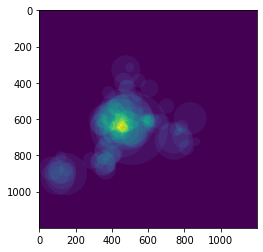

In [34]:
plt.imshow(merged_df['hg_1'][1])

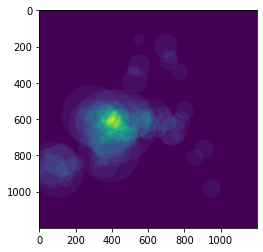

In [35]:
plt.imshow(merged_df['hg_2'][1])

In [36]:
sp_corr_splt_hlf = []
for i in range(len(merged_df)):
    sp_corr_splt_hlf.append(spearmanr(merged_df['hg_1'][i].flatten(), merged_df['hg_2'][i].flatten())[0])
    #break

In [37]:
# Add the Spearman correlation values to the DataFrame
merged_df['sp_corr_splt_hlf'] = sp_corr_splt_hlf

In [38]:
merged_df = merged_df.drop(columns=['hg_1', 'hg_2'])

In [39]:
merged_df

stim_folder stim_name  sp_corr_splt_hlf
0             faces    face01          0.492283
1             faces    face02          0.687678
2             faces    face03          0.634083
3             faces    face04          0.592181
4             faces    face05          0.600470
..              ...       ...               ...
251  pareidolia_inv    75_inv          0.695518
252  pareidolia_inv    78_inv          0.729614
253  pareidolia_inv    80_inv          0.767422
254  pareidolia_inv    81_inv          0.768320
255  pareidolia_inv    83_inv          0.763537

[256 rows x 3 columns]

In [41]:
merged_df = merged_df.groupby('stim_folder')['sp_corr_splt_hlf'].mean().reset_index()
merged_df

stim_folder  sp_corr_splt_hlf
0               faces          0.646486
1           faces_inv          0.644655
2             objects          0.659655
3         objects_inv          0.645310
4          pareidolia          0.695382
5      pareidolia_art          0.640874
6  pareidolia_art_inv          0.653417
7      pareidolia_inv          0.687064

In [42]:
# Define the custom order
custom_order = ['faces', 'faces_inv', 'objects', 'objects_inv', 'pareidolia', 'pareidolia_inv', 'pareidolia_art', 'pareidolia_art_inv']

# Convert the 'stim_folder' column to a Categorical data type with the custom order
merged_df['stim_folder'] = pd.Categorical(merged_df['stim_folder'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the custom order
merged_df_sorted = merged_df.sort_values(by='stim_folder')

# Print the sorted DataFrame
print(merged_df_sorted)

          stim_folder  sp_corr_splt_hlf
0               faces          0.646486
1           faces_inv          0.644655
2             objects          0.659655
3         objects_inv          0.645310
4          pareidolia          0.695382
7      pareidolia_inv          0.687064
5      pareidolia_art          0.640874
6  pareidolia_art_inv          0.653417


In [43]:
# Extract the 'sp_corr_splt_hlf' column and save it to a NumPy array
sp_corr_splt_hlf_array = merged_df_sorted['sp_corr_splt_hlf'].to_numpy()

In [44]:
sp_corr_splt_hlf_array

array([0.64648617, 0.64465511, 0.65965516, 0.64530994, 0.69538224,
       0.68706432, 0.64087402, 0.65341664])

In [ ]:

correlation_coef_objects_iter_img = []

for keys in y_objects:
    mmm = []
    print(keys)
    for i in range(len(y_objects_subs)):
        if y_objects_subs[i][0][0] == keys:
            mmm.append(y_objects_subs[i][1])
            #print(y_faces_subs[i][1])

    # Number of times to perform the bootstrap sampling
    num_iterations = 50
    correlation_coef_objects_iter = []

    for _ in range(num_iterations):

        # Define your dataset
        dataset = list(range(len(mmm)))

        # Perform bootstrap sampling without replacement until no dataset is left
        bootstrap_samples = []
        correlation_coef_objects = []

        while dataset:
            bootstrap_sample = random.sample(dataset, len(dataset))
            bootstrap_samples.append(bootstrap_sample)
            dataset = [x for x in dataset if x not in bootstrap_sample]

        # Print the bootstrap samples
        #for i, sample in enumerate(bootstrap_samples):
        #    print(f"Bootstrap Sample {k + 1}: {sample}")
        
        temp1 = []
        temp2 = []

        for i in bootstrap_samples[0][:int(len(bootstrap_samples[0])/2)]:
            temp1.append(mmm[i])

        for i in bootstrap_samples[0][int(len(bootstrap_samples[0])/2):]:
            temp2.append(mmm[i])

        #print(temp1)
        temp1 = np.mean(temp1, axis=0)
        temp2 = np.mean(temp2, axis=0)
            
            #plt.matshow(mmm[sample[i]])
            #plt.matshow(mmm[sample[i+1]])
        correlation_coef_objects.append(spearmanr(temp1.flatten(),
                                                temp2.flatten())[0])

        correlation_coef_objects_iter.append(np.mean(correlation_coef_objects))
        
        #break
        

    correlation_coef_objects_iter_img.append(np.mean(correlation_coef_objects_iter))
        
    #break
    